In [1]:
from agents import Consumer, Producer, Influencer
from content_market import ContentMarket
import numpy as np

In [2]:
num_producers = 5
num_influencers = 0
num_consumers = 5

topics = [[1, 10]]
topics = np.array(topics)

In [3]:
from util import exponential_decay, inverse_decay, tanh_decay

In [4]:
social_welfare_by_num_producers = []
average_ending_producer_utility_by_num_producers = []
average_ending_consumer_utility_by_num_producers = []
for num_producers in range(1, 20):
    content_market = ContentMarket(topics, num_producers, num_consumers, num_influencers)

    producer_colors = []
    consumer_colors = []

    for i in range(num_producers):
        #func = lambda x: exponential_decay(x, 1)
        # func = lambda x: 1.0
        func = lambda x: inverse_decay(x, 1, 2)
        producer = Producer(i, content_market.sample_topic(), func)
        content_market.add_producer(producer)
        
        color = np.random.rand(3,)
        producer_colors.append(color)

    for i in range(num_consumers):
        #func = lambda x: exponential_decay(x, 1)
        #func = lambda x : 1.0
        func = lambda x: inverse_decay(x, 1, 2)
        consumer = Consumer(i, content_market.sample_topic(), func, 1, .1, 1)
        content_market.add_consumer(consumer)

        color = np.random.rand(3,)
        consumer_colors.append(color)

    consumer_stats, influencer_stats, producer_stats, total_stats, average_stats = content_market.optimize(1, 1, 100)
    social_welfare_by_num_producers.append(total_stats['social_welfare'])
    average_ending_producer_utility_by_num_producers.append(average_stats['producer_utilities'][-1])
    average_ending_consumer_utility_by_num_producers.append(average_stats['consumer_utilities'][-1])
print(social_welfare_by_num_producers)

Iteration 0 / 100 done.
Total Social Welfare: 0.6787561319093663
Iteration 1 / 100 done.
Total Social Welfare: 0.6903912866607942
Consumer rate change: 0.0
Consumer utility change: 0.00232703095028558
Producer topic change: 0.0
Producer utility change: 0.0
Converged.
Iteration 0 / 100 done.
Total Social Welfare: 0.7273963604567337
Iteration 1 / 100 done.
Total Social Welfare: 0.7636954646768042
Consumer rate change: 0.0
Consumer utility change: 0.007259820844014109
Producer topic change: 0.0
Producer utility change: 0.0
Converged.
Iteration 0 / 100 done.
Total Social Welfare: 2.5293024383557428
Iteration 1 / 100 done.
Total Social Welfare: 2.6116029163847916
Consumer rate change: 0.0
Consumer utility change: 0.016460095605809744
Producer topic change: 0.0
Producer utility change: 0.0
Converged.
Iteration 0 / 100 done.
Total Social Welfare: 2.3819140130531022
Iteration 1 / 100 done.
Total Social Welfare: 2.40481988629458
Consumer rate change: 0.0
Consumer utility change: 0.0045811746482

In [5]:
import matplotlib.pyplot as plt

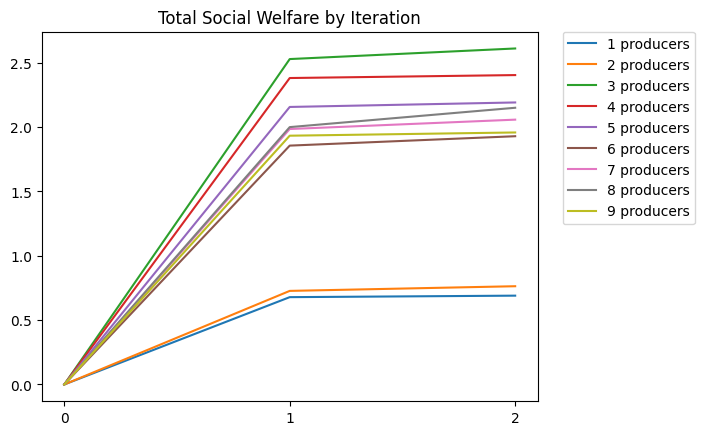

In [6]:
plt.figure()
plt.title("Total Social Welfare by Iteration")
for i in range(len(social_welfare_by_num_producers)):
    plt.plot(social_welfare_by_num_producers[i], label=str(i+1) + " producers")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(range(max(len(x) for x in social_welfare_by_num_producers)))
plt.show()

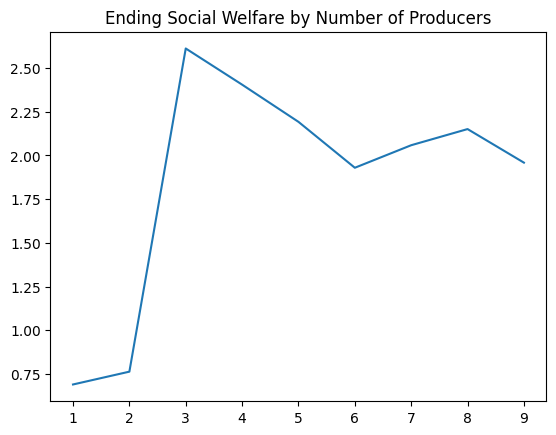

In [7]:
plt.figure()
plt.title("Ending Social Welfare by Number of Producers")
ending_welfare = [x[-1] for x in social_welfare_by_num_producers]
plt.plot(range(1, 20), ending_welfare)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (19,) and (9,)

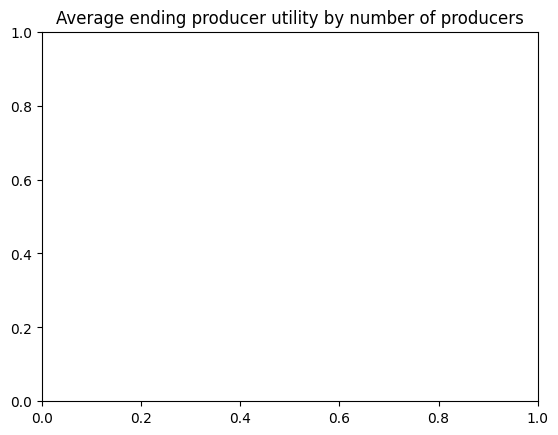

In [8]:
plt.figure()
plt.title("Average ending producer utility by number of producers")
plt.plot(range(1, 20), average_ending_producer_utility_by_num_producers)
plt.xticks(range(1, 20))
plt.show()

In [ ]:
plt.figure()
plt.title("Average ending consumer utility by number of producers")
plt.plot(range(1, 20), average_ending_consumer_utility_by_num_producers)
plt.xticks(range(1, 20))
plt.show()